 * First day: Dealing with spectra

    * Reading/writing ascii files; handling fits files
	* Dealing with arrays
	* Interpolation
	* Fitting models to data
	* Plotting
 
 * Second day: Dealing with tables and imaging

    * Displaying images
	* Cross-matching tables
	* Querying archives
    * Astrometry and WCS

** Reading an ascii file **

In [8]:
%matplotlib inline

In [9]:
# https://github.com/astropy/specutils/raw/master/specutils/io/tests/files/multispec_equispec.11.dat

In [10]:
%%bash
curl -O https://raw.githubusercontent.com/astropy/specutils/master/specutils/io/tests/files/multispec_equispec.11.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27461  100 27461    0     0   146k      0 --:--:-- --:--:-- --:--:--  146k


In [11]:
with open('multispec_equispec.11.dat','r') as fh: # fh is short for file handle
    # file consists of two columns, e.g.:  
    # 14740.266391838  0.8220932
    # 14743.8622868028  -1.856567

    # declare empty list
    all_lines = []
    for line in fh:
        # each line will split on a whitespace
        all_lines.append(line.split())

It's more convenient to work with arrays.  Also, we want the values to be floats intead of strings as they are now:

In [12]:
all_lines[:2]

[['14740.266391838', '0.8220932'], ['14743.8622868028', '-1.856567']]

In [13]:
float_lines = [list(map(float,x)) for x in all_lines]

In [14]:
print("first two float lines: ",float_lines[:2])
print("length(float_lines): ",len(float_lines))

first two float lines:  [[14740.266391838, 0.8220932], [14743.8622868028, -1.856567]]
length(float_lines):  1024


What if we want the array to have dimensions [2,1024] instead of [1024,2]?

In [15]:
float_lines_inverted = list(zip(*float_lines))

In [16]:
float_lines[0][:10]

[14740.266391838, 0.8220932]

Numpy arrays are much more convenient to work with and are generally faster.  As long as you have a list of numbers (not a list of strings), they are easy to use:

In [17]:
import numpy as np
float_lines_array = np.array(float_lines)

In [18]:
float_lines_array.shape

(1024, 2)

For example, transposing an array is much easier with numpy:

In [19]:
float_lines_array.T.shape

(2, 1024)

In [20]:
xaxis, yaxis = float_lines_array.T

With nested lists, you need to index each layer separately, whereas with numpy arrays you can index them together:

In [21]:
float_lines_array[:5,1]

array([ 0.8220932, -1.856567 , -2.0807   , -2.75078  , -1.882897 ])

In [22]:
float_lines[:5]

[[14740.266391838, 0.8220932],
 [14743.8622868028, -1.856567],
 [14747.4581817676, -2.0807],
 [14751.0540767325, -2.75078],
 [14754.6499716973, -1.882897]]

In [23]:
# difficult to access the second column:
list(zip(*float_lines[:5]))[1]

(0.8220932, -1.856567, -2.0807, -2.75078, -1.882897)

Arrays can be manipulated like any other number, and arithmetic operations will be applied to each element:

In [24]:
5 * float_lines_array[:5,1]

array([  4.110466,  -9.282835, -10.4035  , -13.7539  ,  -9.414485])

# Plotting #

In [25]:
import pylab as pl

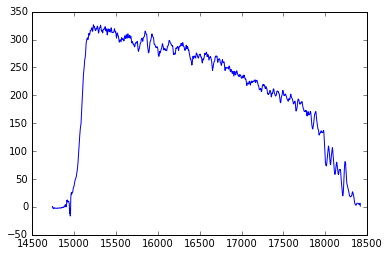

In [26]:
pl.plot(xaxis, yaxis)
pl.savefig("my_first_spectrum_plot.pdf")

# Tools for reading ASCII files #

In [27]:
import numpy as np

In [28]:
arr = np.loadtxt('multispec_equispec.11.dat')
arr

array([[  1.47402664e+04,   8.22093200e-01],
       [  1.47438623e+04,  -1.85656700e+00],
       [  1.47474582e+04,  -2.08070000e+00],
       ..., 
       [  1.84116752e+04,   5.27366100e+00],
       [  1.84152710e+04,   6.57225800e+00],
       [  1.84188669e+04,   1.60453100e+00]])

In [29]:
arr = np.genfromtxt('multispec_equispec.11.dat')
arr

array([[  1.47402664e+04,   8.22093200e-01],
       [  1.47438623e+04,  -1.85656700e+00],
       [  1.47474582e+04,  -2.08070000e+00],
       ..., 
       [  1.84116752e+04,   5.27366100e+00],
       [  1.84152710e+04,   6.57225800e+00],
       [  1.84188669e+04,   1.60453100e+00]])

In [30]:
arr = np.genfromtxt('multispec_equispec.11.dat', delimiter=" ", comments="#",
                    skip_header=0, skip_footer=0)
arr

array([[  1.47402664e+04,              nan,   8.22093200e-01],
       [  1.47438623e+04,              nan,  -1.85656700e+00],
       [  1.47474582e+04,              nan,  -2.08070000e+00],
       ..., 
       [  1.84116752e+04,              nan,   5.27366100e+00],
       [  1.84152710e+04,              nan,   6.57225800e+00],
       [  1.84188669e+04,              nan,   1.60453100e+00]])

In [31]:
from astropy.table import Table
from astropy.io import ascii

In [32]:
tbl = Table.read('multispec_equispec.11.dat', format='ascii.no_header', delimiter=' ')
tbl

col1,col2
float64,float64
14740.2663918,0.8220932
14743.8622868,-1.856567
14747.4581818,-2.0807
14751.0540767,-2.75078
14754.6499717,-1.882897
14758.2458667,-1.653645
14761.8417616,-2.496639
14765.4376566,-2.216392
14769.0335516,-1.711144


In [33]:
import pandas as pd
ptbl = pd.read_csv('multispec_equispec.11.dat', delim_whitespace=True, header=None)
ptbl

,0,1
0,14740.266392,0.822093
1,14743.862287,-1.856567
2,14747.458182,-2.080700
3,14751.054077,-2.750780
4,14754.649972,-1.882897
5,14758.245867,-1.653645
6,14761.841762,-2.496639
7,14765.437657,-2.216392
8,14769.033552,-1.711144
9,14772.629447,-2.086175


## Speed Comparison ##

In [34]:
%timeit pd.read_csv('multispec_equispec.11.dat', delim_whitespace=True, header=None)

1000 loops, best of 3: 1.06 ms per loop


In [35]:
%timeit Table.read('multispec_equispec.11.dat', format='ascii.no_header', delimiter=' ')

1000 loops, best of 3: 1.38 ms per loop


## Exercises ##

1. Read this text file:

  https://raw.githubusercontent.com/astropy/specutils/master/specutils/io/tests/files/AAO_11.txt

  which contains both a header and two data columns.  Plot it, and save as a ``.png`` and as a ``.pdf``

2. Write your own function for file reading.  Based on the original example, write a function that reads a 2-column (or n-column) space-separated text file into a numpy array.  Compare its execution time to that of ``pandas.read_csv`` and ``astropy.io.table.Table.read``.

URL for notebook from this session: ``goo.gl/EIbNDg``

In [29]:
%%bash
curl -O https://raw.githubusercontent.com/astropy/specutils/master/specutils/io/tests/files/AAO_11.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87908  100 87908    0     0  99536      0 --:--:-- --:--:-- --:--:-- 99556


In [45]:
!head -n 180 AAO_11.txt

BITPIX  =                    8  /  8-bit ASCII characters                       
NAXIS   =                    1  /  Number of Image Dimensions                   
NAXIS1  =                 2746  /  Length of axis                               
ORIGIN  = 'NOAO-IRAF: WTEXTIMAGE'  /
IRAF-MAX=                   0.  /  Max image pixel (out of date)                
IRAF-MIN=                   0.  /  Min image pixel (out of date)                
IRAF-B/P=                   32  /  Image bits per pixel                         
IRAFTYPE= 'REAL FLOATING     '  /  Image datatype                              
OBJECT  = 'TW HYA            '  /                                              
FILENAME= 'AAO_11.0011.FITS  '  /  IRAF filename                               
FORMAT  = '5G14.7            '  /  Text line format                            
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator    

How do we exclude the first N lines?

In [44]:
with open('AAO_11.txt','r') as fh:
    for ii,line in enumerate(fh):
        if 'END' in line:
            last_header_line_number = ii

aao_data = np.genfromtxt('AAO_11.txt', skip_header=last_header_line_number+1)
print(last_header_line_number)

174


In [48]:
float('nan') # works
float('1.234') # works
float('blah') # fails

ValueError: could not convert string to float: 'blah'

In [46]:
with open('AAO_11.txt','r') as fh:
    for ii,line in enumerate(fh):
        try:
            float(line.split()[0])
            break
        except (ValueError, IndexError) as ex:
            print(ex)
            continue
last_header_line_number = ii
print(last_header_line_number)


could not convert string to float: 'BITPIX'
could not convert string to float: 'NAXIS'
could not convert string to float: 'NAXIS1'
could not convert string to float: 'ORIGIN'
could not convert string to float: 'IRAF-MAX='
could not convert string to float: 'IRAF-MIN='
could not convert string to float: 'IRAF-B/P='
could not convert string to float: 'IRAFTYPE='
could not convert string to float: 'OBJECT'
could not convert string to float: 'FILENAME='
could not convert string to float: 'FORMAT'
could not convert string to float: 'EXTEND'
could not convert string to float: 'ORIGIN'
could not convert string to float: 'DATE'
could not convert string to float: 'IRAF-TLM='
could not convert string to float: 'OBJECT'
could not convert string to float: 'COMMENT'
could not convert string to float: 'COMMENT'
could not convert string to float: 'DCT_DATE='
could not convert string to float: 'DCT_VER'
could not convert string to float: 'DETECXE'
could not convert string to float: 'DETECXS'
could not

In [37]:
ll = ['a','b','c']
for ii,x in enumerate(ll):
    print(ii, x)

0 a
1 b
2 c


In [35]:
aao_data

array([[ 7338.50780871,   703.5236    ],
       [ 7338.46870556,   721.9175    ],
       [ 7338.42960094,   757.0006    ],
       ..., 
       [ 7226.18595796,   914.5856    ],
       [ 7226.14331306,  1079.059     ],
       [ 7226.10066704,   928.7758    ]])

In [53]:
# inf vs nan
np.inf, -np.inf, np.nan
(np.isfinite([np.inf, -np.inf, np.nan, 0]),
 np.isnan([np.inf, -np.inf, np.nan, 0]),
 np.nan == np.nan)

(array([False, False, False,  True], dtype=bool),
 array([False, False,  True, False], dtype=bool),
 False)

In [55]:
None, bool(None), None == np.nan

(None, False, False)

In [59]:
def f():
    pass
f() is None # preferred
f() == None # can result in problems in some situations

True

# Reading FITS files #

In [40]:
%%bash
curl -O https://raw.githubusercontent.com/astropy/specutils/master/specutils/io/tests/files/gbt_1d.fits

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  51021      0 --:--:-- --:--:-- --:--:-- 50973


FITs files can be read....

In [41]:
from astropy.io import fits
from astropy.wcs import WCS

In [42]:
fh = fits.open('gbt_1d.fits')
fh

In [43]:
data_hdu = fh[0]

In [44]:
data_hdu.header

 [astropy.io.fits.verify]



SIMPLE  =                    T / Written by IDL:  Fri Aug 19 18:36:44 2011      
BITPIX  = -64                                                                   
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 4096                                                  
CDELT1  =   -0.25258831                                                         
CRPIX1  =   2049.0000                                                           
CRVAL1  =   7.5845751                                                           
CTYPE1  =  'VRAD'                                                               
CUNIT1  =  'km/s    '                                                           
SPECSYS =  'LSRK'                                                               
RESTFRQ =        1.4488479E+10                                                  
VELOSYS =   -3940.7291                                                          
CDELT1F =   12207.031       

In [45]:
data_hdu.data.shape

(4096,)

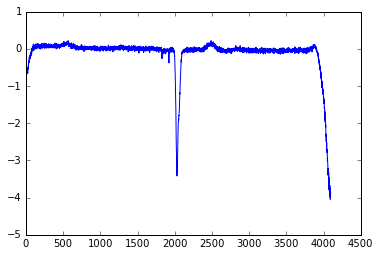

In [46]:
pl.plot(data_hdu.data)

Generate the x axis:

In [47]:
hdr = data_hdu.header

In [48]:
xarr = (np.arange(hdr['NAXIS1']) - hdr['CRPIX1'] + 1) * hdr['CDELT1'] + hdr['CRVAL1'] 

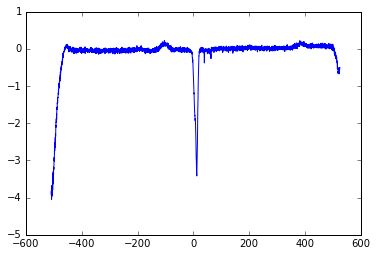

In [49]:
pl.plot(xarr, data_hdu.data)

In [50]:
from astropy import units as u
xarr_u = xarr*u.Unit(hdr['CUNIT1'])

In [51]:
xarr_u

<Quantity [ 524.88543398, 524.63284567, 524.38025736,..., -508.95851885,
           -509.21110716,-509.46369547] km / s>

In [52]:
xarr_u.unit.to_string(format='latex')

'$\\mathrm{\\frac{km}{s}}$'

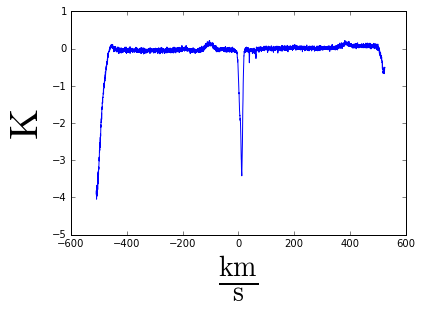

In [53]:
pl.plot(xarr_u, data_hdu.data)
pl.xlabel(xarr_u.unit.to_string(format='latex'), fontsize=40)
pl.ylabel(u.Unit(hdr['BUNIT']).to_string(format='latex'), fontsize=40)

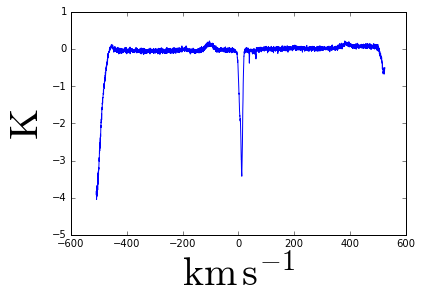

In [54]:
pl.plot(xarr_u, data_hdu.data)
pl.xlabel(xarr_u.unit.to_string(format='latex_inline'), fontsize=40)
pl.ylabel(u.Unit(hdr['BUNIT']).to_string(format='latex'), fontsize=40)

In [55]:
mywcs = WCS(hdr)
mywcs

WCS Keywords

Number of WCS axes: 1
CTYPE : 'VRAD'  
CRVAL : 7584.5751  
CRPIX : 2049.0  
PC1_1  : 1.0  
CDELT : -252.58830999999998  
NAXIS    : 4096 0

In [56]:
xarr_again = mywcs.wcs_pix2world(np.arange(hdr['NAXIS1']), 0) * u.Unit(mywcs.wcs.cunit[0])

In [57]:
xarr_u

<Quantity [ 524.88543398, 524.63284567, 524.38025736,..., -508.95851885,
           -509.21110716,-509.46369547] km / s>

In [58]:
xarr_again

<Quantity [[ 524885.43398, 524632.84567, 524380.25736,..., -508958.51885,
            -509211.10716,-509463.69547]] m / s>

In [59]:
np.isclose(xarr_again, xarr_u, atol=0)

array([[ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [60]:
from specutils.io import fits

In [61]:
spec = fits.read_fits_spectrum1d('gbt_1d.fits')

In [62]:
import specutils
import numpy
import astropy
specutils.__version__, astropy.__version__, numpy.__version__

('0.2.dev596', '1.2.dev14793', '1.10.4')

In [63]:
spec.velocity

<Quantity [ 524.88543398, 524.63284567, 524.38025736,..., -508.95851885,
           -509.21110716,-509.46369547] km / s>

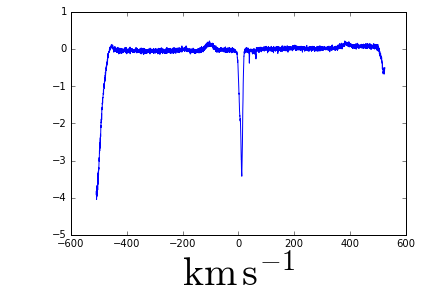

In [64]:
pl.plot(spec.velocity, spec.flux)
pl.xlabel(spec.velocity.unit.to_string(format='latex_inline'), fontsize=40)
pl.ylabel(spec.flux.unit.to_string(format='latex'), fontsize=40)

In [65]:
# you'll need to ``pip install pyspeckit`` to get access to this
import pyspeckit

In [66]:
sp = pyspeckit.Spectrum('gbt_1d.fits')

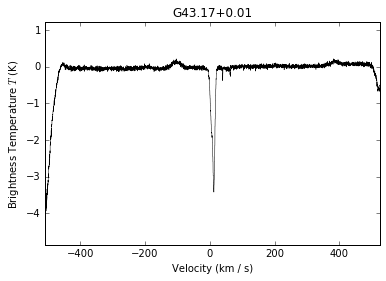

In [67]:
sp.plotter()

# Interpolation # 

Functions for interpolation:

  * `np.interp1d`
  * `scipy.interpolate`
  * `pyspeckit.interpolation`

# Convolution #

 * `np.convolve`
 * `scipy.ndimage.convolve`
 * `astropy.convolution`
 * `pyspeckit.smooth`

# Exercises #

1. Load the ``gbt_1d.fits`` spectrum and plot it

2. Interpolate the spectrum onto a new finer grid from -50 to 50 km/s with 1000 channels

3. Smooth the spectrum by 8 km/s, then interpolate it onto a coarser grid from -400 to 400 km/s with 200 channels

In [1]:
import specutils
from specutils.io import fits

In [60]:
spec = fits.read_fits_spectrum1d('gbt_1d.fits')

In [61]:
spec.flux

<Quantity [-0.50829212,-0.49870891,-0.52269076,..., -3.81450779,
           -3.85548328,-3.90748133]>

In [62]:
spec.velocity

<Quantity [ 524.88543398, 524.63284567, 524.38025736,..., -508.95851885,
           -509.21110716,-509.46369547] km / s>

In [6]:
from astropy import units as u

In [63]:
new_xarr = np.linspace(-50, 50, 1000)*u.km/u.s

In [66]:
new_xarr

<Quantity [-50.        ,-49.8998999 ,-49.7997998 ,-49.6996997 ,
           -49.5995996 ,-49.4994995 ,-49.3993994 ,-49.2992993 ,
           -49.1991992 ,-49.0990991 ,-48.998999  ,-48.8988989 ,
           -48.7987988 ,-48.6986987 ,-48.5985986 ,-48.4984985 ,
           -48.3983984 ,-48.2982983 ,-48.1981982 ,-48.0980981 ,
           -47.997998  ,-47.8978979 ,-47.7977978 ,-47.6976977 ,
           -47.5975976 ,-47.4974975 ,-47.3973974 ,-47.2972973 ,
           -47.1971972 ,-47.0970971 ,-46.996997  ,-46.8968969 ,
           -46.7967968 ,-46.6966967 ,-46.5965966 ,-46.4964965 ,
           -46.3963964 ,-46.2962963 ,-46.1961962 ,-46.0960961 ,
           -45.995996  ,-45.8958959 ,-45.7957958 ,-45.6956957 ,
           -45.5955956 ,-45.4954955 ,-45.3953954 ,-45.2952953 ,
           -45.1951952 ,-45.0950951 ,-44.99499499,-44.89489489,
           -44.79479479,-44.69469469,-44.59459459,-44.49449449,
           -44.39439439,-44.29429429,-44.19419419,-44.09409409,
           -43.99399399,-43.89389389,-43

In [68]:
np.interp?

In [23]:
interpolated_data = np.interp(new_xarr[::-1], spec.velocity[::-1], spec.flux[::-1])

In [24]:
%matplotlib inline
import pylab as pl

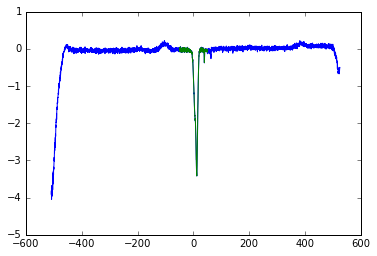

In [27]:
pl.plot(spec.velocity, spec.flux)
pl.plot(new_xarr[::-1], interpolated_data)

(-50, 50)

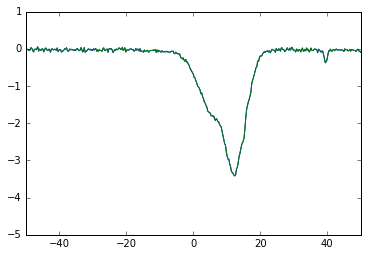

In [28]:
pl.plot(spec.velocity, spec.flux)
pl.plot(new_xarr[::-1], interpolated_data)
pl.xlim(-50, 50)